In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, ensemble, metrics
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import pandas as pd

In [2]:
def load_wdbc_data(filename):
    class WDBCData:
        data = []
        target = []
        target_names = ['malignant', 'benign']
        feature_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
                         'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error',
                         'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
    wdbc = WDBCData()
    with open(filename) as f:
        reader = pd.read_csv(f)
        data = np.array(reader)
        wdbc.data = data[:, 2:]
        for line in data:
            if line[1] == 'M':
                wdbc.target.append(0)
            else:
                wdbc.target.append(1)        
    wdbc.target = np.array(wdbc.target)
    return wdbc

In [3]:
wdbc = load_wdbc_data('data/wdbc.data')

In [4]:
model = tree.DecisionTreeClassifier(max_depth = 2)
model.fit(wdbc.data[:, :2], wdbc.target)

DecisionTreeClassifier(max_depth=2)

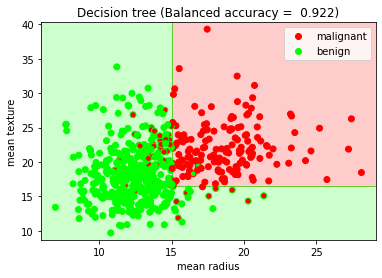

In [9]:
cmap = np.array([(1, 0, 0), (0, 1, 0)])
clabel = [Line2D([0], [0], marker='o', lw=0, label=wdbc.target_names[i], color=cmap[i]) for i in range(len(cmap))]

x_min, x_max = wdbc.data[:, 0].min() - 1, wdbc.data[:, 0].max() + 1
y_min, y_max = wdbc.data[:, 1].min() - 1, wdbc.data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xy = np.vstack((xx.flatten(), yy.flatten())).T
zz = model.predict(xy)
plt.contourf(xx, yy, zz.reshape(xx.shape), cmap = ListedColormap(cmap), alpha = 0.2)

predict = model.predict(wdbc.data[:, :2])
balanced_accuracy = metrics.balanced_accuracy_score(predict, wdbc.target)

for (x, y) in [(0, 1)]:
    plt.title(f'Decision tree (Balanced accuracy = {balanced_accuracy : .3f})')
    plt.scatter(wdbc.data[:,x], wdbc.data[:,y], c=cmap[wdbc.target], edgecolors=cmap[predict])
    plt.xlabel(wdbc.feature_names[x])
    plt.ylabel(wdbc.feature_names[y])
    plt.legend(handles = clabel)
    plt.show()

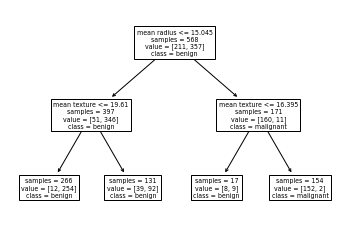

In [6]:
tree.plot_tree(model, feature_names = wdbc.feature_names, class_names = wdbc.target_names, impurity = False)
plt.show()